In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(135deg, #1e3a8a, #4f46e5); text-align: right;"> سوال 2 آمار توصیفی </div>


In [2]:
df = pd.read_excel('df_q2.xlsx')
df.head()


,vehicle,motorcycle,bicycle,year
0,True,False,False,98
1,True,False,True,98
2,True,True,False,98
3,False,False,False,98
4,True,True,True,98


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;"> بررسی دیتا </div>


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153736 entries, 0 to 153735
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   vehicle     153736 non-null  bool 
 1   motorcycle  153736 non-null  bool 
 2   bicycle     153736 non-null  bool 
 3   year        153736 non-null  int64
dtypes: bool(3), int64(1)
memory usage: 1.6 MB


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;"> بررسی مقادیر گمشده </div>


In [4]:
df.isnull().sum()


vehicle       0
motorcycle    0
bicycle       0
year          0
dtype: int64

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;"> آماده‌سازی دیتا برای ترسیم نمودار </div>


In [5]:
df_melted = df.melt(id_vars='year', value_vars=['vehicle', 'motorcycle', 'bicycle'], var_name='vehicle_type', value_name='usage')

df_filtered = df_melted[df_melted['usage'] == True]

df_grouped = df_filtered.groupby(['year', 'vehicle_type']).size().reset_index(name='count')


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;"> رسم نمودار توزیع </div>


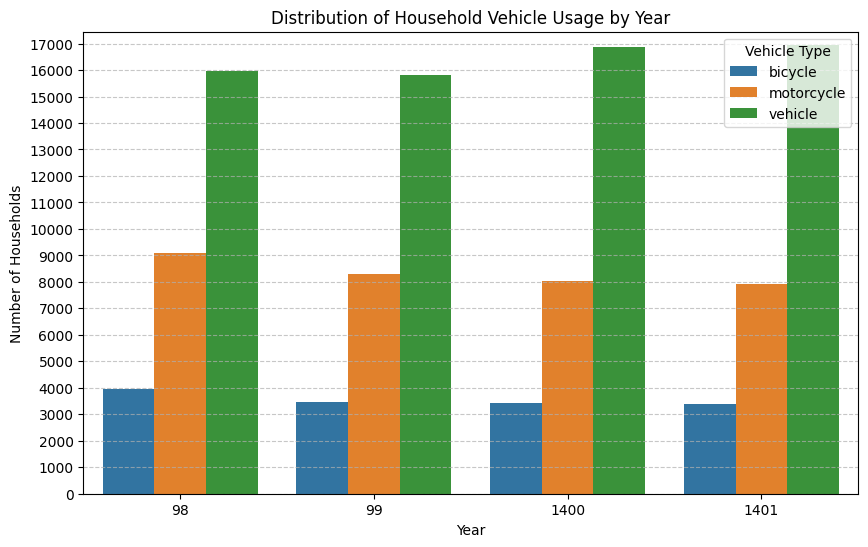

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='year', y='count', hue='vehicle_type', errorbar=None, dodge=True)
plt.ylim(0, df_grouped['count'].max() + 500)
plt.yticks(range(0, df_grouped['count'].max() + 1000, 1000))
plt.title('Distribution of Household Vehicle Usage by Year')
plt.xlabel('Year')
plt.ylabel('Number of Households')
plt.legend(title='Vehicle Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
